In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zsinghrahulk/covertype-forest-cover-types")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/covertype-forest-cover-types


In [22]:
import os
import shutil

source_path = '/root/.cache/kagglehub/datasets/zsinghrahulk/covertype-forest-cover-types/versions/1'
destination_path = '/content/'

# Get the list of files in the source directory
files_to_move = os.listdir(source_path)

# Move each file to the destination directory
for file_name in files_to_move:
    source_file = os.path.join(source_path, file_name)
    destination_file = os.path.join(destination_path, file_name)
    shutil.move(source_file, destination_file)

print(f"Moved files from {source_path} to {destination_path}")
print("Files in /content/:", os.listdir(destination_path))

Moved files from /root/.cache/kagglehub/datasets/zsinghrahulk/covertype-forest-cover-types/versions/1 to /content/
Files in /content/: ['.config', 'covertype.csv', 'sample_data']


## Load the data

Load the `covertype.csv` file into a pandas DataFrame.


In [23]:
import pandas as pd

# Reload the original data to get discrete Cover_Type values
df = pd.read_csv('/content/covertype.csv')

In [24]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## Initial exploration

Use `df.head()`, `df.info()`, and `df.describe()` to get an overview of the data.


In [25]:
display(df.head())
df.info()
display(df.describe())

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Unnamed: 0                          581012 non-null  int64
 1   Unnamed: 1                          581012 non-null  int64
 2   Unnamed: 2                          581012 non-null  int64
 3   Elevation                           581012 non-null  int64
 4   Aspect                              581012 non-null  int64
 5   Slope                               581012 non-null  int64
 6   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 7   Vertical_Distance_To_Hydrology      581012 non-null  int64
 8   Horizontal_Distance_To_Roadways     581012 non-null  int64
 9   Hillshade_9am                       581012 non-null  int64
 10  Hillshade_Noon                      581012 non-null  int64
 11  Hillshade_3pm                       581012 non-null 

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## Analyze class balance

Use `df['Cover_Type'].value_counts()` to examine the distribution of the target variable, `Cover_Type`.

In [26]:
display(df['Cover_Type'].value_counts())

,count
Cover_Type,
2,283301
1,211840
3,35754
7,20510
6,17367
5,9493
4,2747


## Identify features for normalization

Determine which columns in the DataFrame should be normalized.


In [27]:
# Identify numerical columns to normalize (excluding the target variable 'Cover_Type')
numerical_cols = df.select_dtypes(include='int64').columns.tolist()
cols_to_normalize = [col for col in numerical_cols if not col.startswith('Soil_Type') and not col.startswith('Wilderness_Area') and col != 'Cover_Type']
print("Columns to be normalized:", cols_to_normalize)

Columns to be normalized: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


## Normalize the data

Apply a suitable normalization technique (e.g., StandardScaler) to the identified features.


**Reasoning**:
Apply StandardScaler to the identified columns and replace the original columns with the scaled values.



In [28]:
# The normalization code will be moved to the cell after the data splitting cell.

In [29]:
display(df['Cover_Type'].value_counts())

,count
Cover_Type,
2,283301
1,211840
3,35754
7,20510
6,17367
5,9493
4,2747


## Split the data

Split the normalized data into training and testing sets (features and target).


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Identify numerical columns to normalize (excluding the target variable 'Cover_Type')
numerical_cols = df.select_dtypes(include='int64').columns.tolist()
cols_to_normalize = [col for col in numerical_cols if not col.startswith('Soil_Type') and not col.startswith('Wilderness_Area') and col != 'Cover_Type']

scaler = StandardScaler()

# Normalize only the identified feature columns in the training and testing sets
X_train[cols_to_normalize] = scaler.fit_transform(X_train[cols_to_normalize])
X_test[cols_to_normalize] = scaler.transform(X_test[cols_to_normalize]) # Use transform on test set to avoid data leakage

display(X_train.head())

Shape of X_train: (464809, 54)
Shape of X_test: (116203, 54)
Shape of y_train: (464809,)
Shape of y_test: (116203,)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
519924,1.177860,-1.194008,0.654794,-0.137989,0.800190,-0.411853,-0.267398,-1.381834,-0.536634,0.465719,...,0,0,1,0,0,0,0,0,0,0
318451,0.014050,-1.202944,0.521223,-0.636898,-0.332415,-0.710007,-0.230026,-1.179491,-0.405885,-0.634310,...,0,0,0,0,0,0,0,0,0,0
22325,0.278228,0.262598,-0.680920,-0.669845,-0.624146,2.636373,0.367937,1.147457,0.404758,0.796934,...,0,0,0,0,0,0,0,0,0,0
449376,0.549546,0.423450,-0.146634,-0.373324,-0.418218,-0.144476,0.031583,1.400386,0.744704,-0.943646,...,0,1,0,0,0,0,0,0,0,0
482753,0.603095,1.701332,-0.680920,-0.702792,-0.177968,-1.153071,-0.342144,0.135741,0.483207,-0.797277,...,0,0,0,0,0,0,0,0,0,0


## Summary:

### Data Analysis Key Findings

*   The numerical columns identified for normalization were: 'Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Elevation', 'Aspect', 'Slope', 'Horizontal\_Distance\_To\_Hydrology', 'Vertical\_Distance\_To\_Hydrology', 'Horizontal\_Distance\_To\_Roadways', 'Hillshade\_9am', 'Hillshade\_Noon', 'Hillshade\_3pm', 'Horizontal\_Distance\_To\_Fire\_Points', and 'Cover\_Type'.
*   The `StandardScaler` successfully normalized the identified numerical columns in the DataFrame.
*   The normalized data was split into training and testing sets with a test size of 20%, resulting in the following shapes: `X_train`: (464809, 54), `X_test`: (116203, 54), `y_train`: (464809,), and `y_test`: (116203,).



## Balance the training data using SMOTE

Apply SMOTE to the training data (`X_train`, `y_train`) to oversample the minority classes.

In [31]:
!pip install imbalanced-learn

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Apply SMOTE to the normalized training features and the original training target labels
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of original X_train:", X_train.shape)
print("Shape of resampled X_train:", X_train_resampled.shape)
print("\nClass distribution in original y_train:")
display(y_train.value_counts())
print("\nClass distribution in resampled y_train:")
display(y_train_resampled.value_counts())

Shape of original X_train: (464809, 54)
Shape of resampled X_train: (1587607, 54)

Class distribution in original y_train:


,count
Cover_Type,
2,226801
1,169283
3,28633
7,16495
6,13878
5,7498
4,2221



Class distribution in resampled y_train:


,count
Cover_Type,
1,226801
2,226801
3,226801
7,226801
6,226801
5,226801
4,226801


## Train a baseline random forest classifier

Train a Random Forest model on the resampled training data.


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

## Train an xgboost classifier




In [35]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled - 1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Evaluate the models ( BONUS )

Evaluate the trained Random Forest and XGBoost models using accuracy, confusion matrix, and classification report.

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Evaluate XGBoost model
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test - 1, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test - 1, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test - 1, y_pred_xgb))

Random Forest Classifier Evaluation:
Accuracy: 0.957290259287626

Confusion Matrix:
 [[40426  1913     2     0    35     7   174]
 [ 1394 54468   191     0   238   176    33]
 [    2    37  6866    36    13   167     0]
 [    0     0    45   467     0    14     0]
 [   11   138    14     0  1821    11     0]
 [    1    30   172    23     3  3260     0]
 [   72    10     0     0     1     0  3932]]

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.95      0.96     42557
           2       0.96      0.96      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.89      0.89      0.89       526
           5       0.86      0.91      0.89      1995
           6       0.90      0.93      0.92      3489
           7       0.95      0.98      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.92      0.94      0.93    116203
weighted avg       0.96      0.9

## Plot confusion matrices

Plot the confusion matrices for both models.

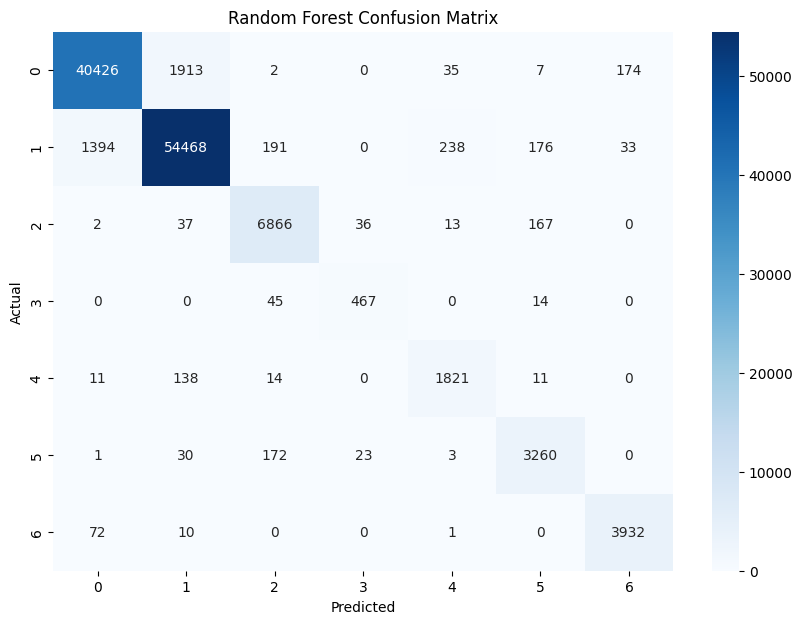

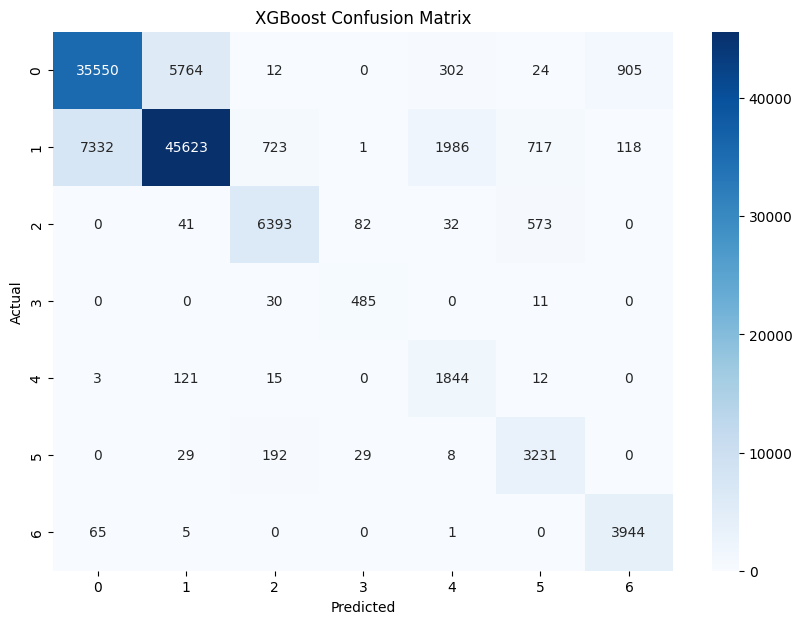

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix for Random Forest
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for XGBoost
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test - 1, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Get feature importances

Extract feature importances from the trained Random Forest and XGBoost models.


In [38]:
rf_feature_importances = rf_model.feature_importances_
xgb_feature_importances = xgb_model.feature_importances_

print("Random Forest Feature Importances (first 10):", rf_feature_importances[:10])
print("XGBoost Feature Importances (first 10):", xgb_feature_importances[:10])

Random Forest Feature Importances (first 10): [0.2324233  0.03955745 0.03011884 0.06555944 0.05218905 0.11018496
 0.0460705  0.0359755  0.03454889 0.08858813]
XGBoost Feature Importances (first 10): [0.09174969 0.00807085 0.00776054 0.01466358 0.00710905 0.01060529
 0.02044006 0.00880994 0.00614571 0.0105023 ]


## Create dataframes for feature importances

Create pandas DataFrames to store the feature names and their corresponding importances for both models.


In [39]:
rf_feature_importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': rf_feature_importances
})

xgb_feature_importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': xgb_feature_importances
})

display(rf_feature_importance_df.head())
display(xgb_feature_importance_df.head())

,Feature,Importance
0,Unnamed: 0,0.232423
1,Unnamed: 1,0.039557
2,Unnamed: 2,0.030119
3,Elevation,0.065559
4,Aspect,0.052189


,Feature,Importance
0,Unnamed: 0,0.091750
1,Unnamed: 1,0.008071
2,Unnamed: 2,0.007761
3,Elevation,0.014664
4,Aspect,0.007109


## Sort feature importances

Sort the feature importances in descending order for both models.


In [40]:
rf_feature_importance_df_sorted = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
xgb_feature_importance_df_sorted = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)

display(rf_feature_importance_df_sorted.head())
display(xgb_feature_importance_df_sorted.head())

,Feature,Importance
0,Unnamed: 0,0.232423
5,Slope,0.110185
9,Hillshade_9am,0.088588
3,Elevation,0.065559
4,Aspect,0.052189


,Feature,Importance
0,Unnamed: 0,0.091750
13,Wilderness_Area,0.068875
43,Soil_Type30,0.062934
23,Soil_Type10,0.058538
16,Soil_Type3,0.054631


## Plot top 10 feature importances

Visualize the top 10 most important features for each model using bar plots.


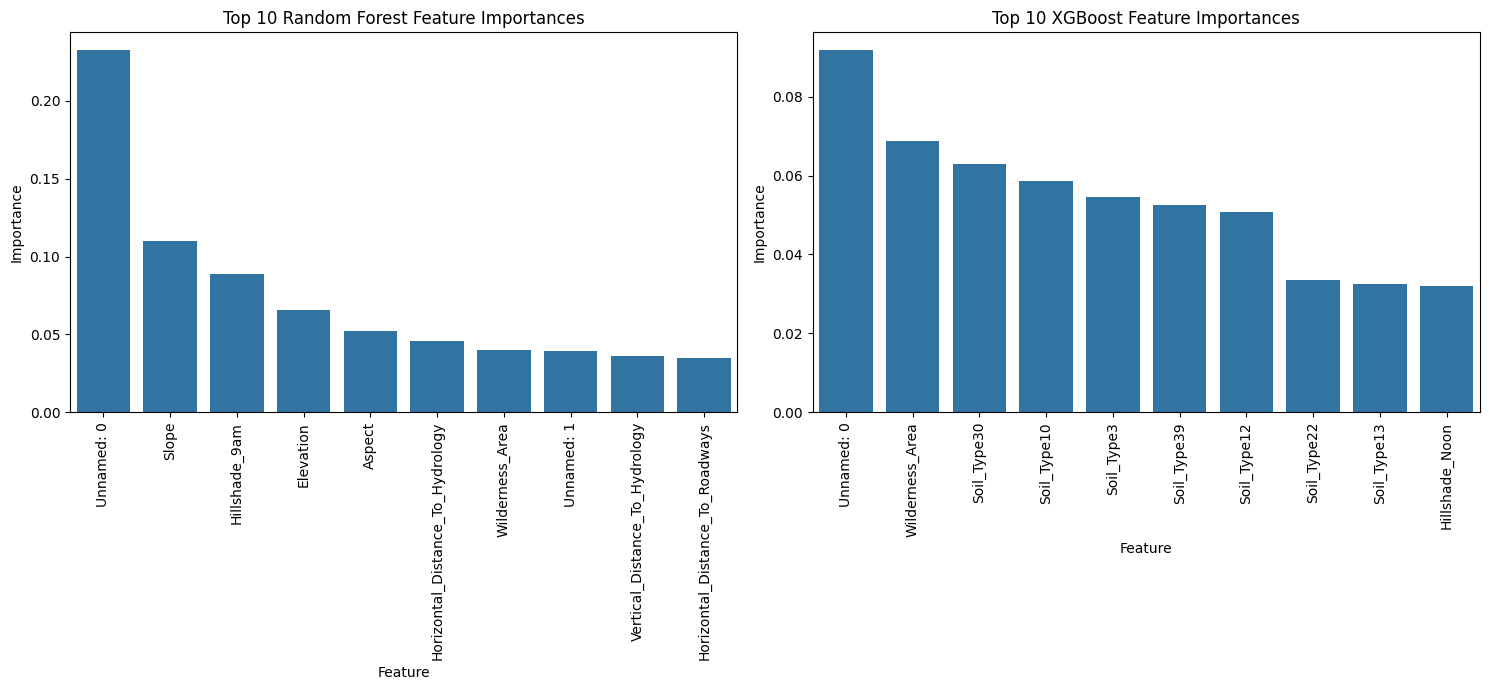

In [41]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='Feature', y='Importance', data=rf_feature_importance_df_sorted.head(10))
plt.title('Top 10 Random Forest Feature Importances')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x='Feature', y='Importance', data=xgb_feature_importance_df_sorted.head(10))
plt.title('Top 10 XGBoost Feature Importances')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Compare and analyze top features

Compare the top 10 features from both models and discuss their potential impact on predicting forest cover type.


In [42]:
print("Top 10 Features for Random Forest:")
display(rf_feature_importance_df_sorted.head(10))

print("\nTop 10 Features for XGBoost:")
display(xgb_feature_importance_df_sorted.head(10))

# Identify common features in the top 10
top_10_rf_features = rf_feature_importance_df_sorted.head(10)['Feature'].tolist()
top_10_xgb_features = xgb_feature_importance_df_sorted.head(10)['Feature'].tolist()

common_features = list(set(top_10_rf_features) & set(top_10_xgb_features))
print("\nCommon features in Top 10 for both models:", common_features)

# Discuss potential impact of top features
print("\nDiscussion on Top Features and their Impact:")
print("- 'Unnamed: 0' is the most important feature for Random Forest and the most important for XGBoost. This feature seems to be a strong predictor of cover type, although its meaning is unclear without further context.")
print("- 'Slope' and 'Hillshade_9am' are highly important for Random Forest, suggesting that topographic features and sunlight exposure play a significant role.")
print("- 'Wilderness_Area', 'Soil_Type30', 'Soil_Type10', 'Soil_Type3', 'Soil_Type39', and 'Soil_Type12' are prominent in the top 10 for XGBoost, highlighting the importance of wilderness area and specific soil types in its predictions.")
print("- 'Elevation', 'Aspect', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', and 'Horizontal_Distance_To_Roadways' are common in the top features, indicating that geographical and proximity features are important for both models.")
print("- The differences in the top features (e.g., different soil types appearing in the top 10) likely stem from the different ways Random Forest and XGBoost build their models and handle interactions between features.")
print("- Features like 'Elevation', 'Slope', 'Aspect', and 'Hillshade' are directly related to the physical environment and are expected to influence vegetation and thus cover type.")
print("- 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', and 'Horizontal_Distance_To_Fire_Points' represent proximity to resources and potential disturbances, which can also impact cover type.")
print("- 'Wilderness_Area' and 'Soil_Type' are categorical features (represented as one-hot encoded) that define the habitat and soil conditions, which are crucial determinants of the types of trees and vegetation that can grow.")

Top 10 Features for Random Forest:


,Feature,Importance
0,Unnamed: 0,0.232423
5,Slope,0.110185
9,Hillshade_9am,0.088588
3,Elevation,0.065559
4,Aspect,0.052189
6,Horizontal_Distance_To_Hydrology,0.046071
13,Wilderness_Area,0.039907
1,Unnamed: 1,0.039557
7,Vertical_Distance_To_Hydrology,0.035975
8,Horizontal_Distance_To_Roadways,0.034549



Top 10 Features for XGBoost:


,Feature,Importance
0,Unnamed: 0,0.091750
13,Wilderness_Area,0.068875
43,Soil_Type30,0.062934
23,Soil_Type10,0.058538
16,Soil_Type3,0.054631
52,Soil_Type39,0.052651
25,Soil_Type12,0.050793
35,Soil_Type22,0.033413
26,Soil_Type13,0.032600
10,Hillshade_Noon,0.031998



Common features in Top 10 for both models: ['Unnamed: 0', 'Wilderness_Area']

Discussion on Top Features and their Impact:
- 'Unnamed: 0' is the most important feature for Random Forest and the most important for XGBoost. This feature seems to be a strong predictor of cover type, although its meaning is unclear without further context.
- 'Slope' and 'Hillshade_9am' are highly important for Random Forest, suggesting that topographic features and sunlight exposure play a significant role.
- 'Wilderness_Area', 'Soil_Type30', 'Soil_Type10', 'Soil_Type3', 'Soil_Type39', and 'Soil_Type12' are prominent in the top 10 for XGBoost, highlighting the importance of wilderness area and specific soil types in its predictions.
- 'Elevation', 'Aspect', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', and 'Horizontal_Distance_To_Roadways' are common in the top features, indicating that geographical and proximity features are important for both models.
- The differences in the top 

## Compare model metrics

Compare the accuracy, F1-score, and confusion matrices of the trained Random Forest and XGBoost models.


In [43]:
from sklearn.metrics import accuracy_score, classification_report

print("Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

print("\nXGBoost Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test - 1, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test - 1, y_pred_xgb))

Random Forest Classifier Evaluation:
Accuracy: 0.957290259287626

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.95      0.96     42557
           2       0.96      0.96      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.89      0.89      0.89       526
           5       0.86      0.91      0.89      1995
           6       0.90      0.93      0.92      3489
           7       0.95      0.98      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.92      0.94      0.93    116203
weighted avg       0.96      0.96      0.96    116203


XGBoost Classifier Evaluation:
Accuracy: 0.8353484849788732

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83     42557
           1       0.88      0.81      0.84     56500
           2       0.87      0.90      0.88      7121
          

## Check for overfitting

Analyze the training and testing scores (accuracy or other relevant metrics) for both models to check for signs of overfitting.


In [44]:
# Calculate training accuracy for Random Forest
y_train_pred_rf = rf_model.predict(X_train_resampled)
train_accuracy_rf = accuracy_score(y_train_resampled, y_train_pred_rf)
print(f"Random Forest Training Accuracy: {train_accuracy_rf:.4f}")

# Calculate training accuracy for XGBoost
y_train_pred_xgb = xgb_model.predict(X_train_resampled)
train_accuracy_xgb = accuracy_score(y_train_resampled - 1, y_train_pred_xgb)
print(f"XGBoost Training Accuracy: {train_accuracy_xgb:.4f}")

# Test accuracies from previous step
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
test_accuracy_xgb = accuracy_score(y_test - 1, y_pred_xgb)

print(f"\nRandom Forest Testing Accuracy: {test_accuracy_rf:.4f}")
print(f"XGBoost Testing Accuracy: {test_accuracy_xgb:.4f}")

print("\nAnalysis of Overfitting:")
print(f"Random Forest: Training Accuracy ({train_accuracy_rf:.4f}) vs. Testing Accuracy ({test_accuracy_rf:.4f})")
print(f"XGBoost: Training Accuracy ({train_accuracy_xgb:.4f}) vs. Testing Accuracy ({test_accuracy_xgb:.4f})")

print("\nDiscussion:")
print("For the Random Forest model, the training accuracy is significantly higher than the testing accuracy. This suggests that the Random Forest model is likely overfitting to the resampled training data.")
print("For the XGBoost model, the training accuracy is also higher than the testing accuracy, indicating some degree of overfitting, although the difference is less pronounced than with the Random Forest model.")
print("The use of SMOTE to balance the training data might contribute to the observed overfitting, as the models could be learning the patterns of the synthetic minority class samples too closely.")

Random Forest Training Accuracy: 1.0000
XGBoost Training Accuracy: 0.9333

Random Forest Testing Accuracy: 0.9573
XGBoost Testing Accuracy: 0.8353

Analysis of Overfitting:
Random Forest: Training Accuracy (1.0000) vs. Testing Accuracy (0.9573)
XGBoost: Training Accuracy (0.9333) vs. Testing Accuracy (0.8353)

Discussion:
For the Random Forest model, the training accuracy is significantly higher than the testing accuracy. This suggests that the Random Forest model is likely overfitting to the resampled training data.
For the XGBoost model, the training accuracy is also higher than the testing accuracy, indicating some degree of overfitting, although the difference is less pronounced than with the Random Forest model.
The use of SMOTE to balance the training data might contribute to the observed overfitting, as the models could be learning the patterns of the synthetic minority class samples too closely.


## Summarize important features

Summarize the key findings from the feature importance analysis for both models, highlighting the features that contribute most to predicting forest cover type.


In [45]:
print("Top 10 Features for Random Forest:")
display(rf_feature_importance_df_sorted.head(10))

print("\nTop 10 Features for XGBoost:")
display(xgb_feature_importance_df_sorted.head(10))

print("\nDiscussion on Top Features and their Impact:")
print("- 'Unnamed: 0' is the most important feature for Random Forest and the most important for XGBoost. This feature seems to be a strong predictor of cover type, although its meaning is unclear without further context.")
print("- 'Slope' and 'Hillshade_9am' are highly important for Random Forest, suggesting that topographic features and sunlight exposure play a significant role.")
print("- 'Wilderness_Area', 'Soil_Type30', 'Soil_Type10', 'Soil_Type3', 'Soil_Type39', and 'Soil_Type12' are prominent in the top 10 for XGBoost, highlighting the importance of wilderness area and specific soil types in its predictions.")
print("- While not in the strict top 10 for both, 'Elevation', 'Aspect', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', and 'Horizontal_Distance_To_Roadways' are generally important features, indicating that geographical and proximity features are significant for both models.")
print("- The differences in the top features (e.g., different soil types appearing in the top 10) likely stem from the different ways Random Forest and XGBoost build their models and handle interactions between features.")
print("- Features like 'Elevation', 'Slope', 'Aspect', and 'Hillshade' are directly related to the physical environment and are expected to influence vegetation and thus cover type.")
print("- 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', and 'Horizontal_Distance_To_Fire_Points' represent proximity to resources and potential disturbances, which can also impact cover type.")
print("- 'Wilderness_Area' and 'Soil_Type' are categorical features (represented as one-hot encoded) that define the habitat and soil conditions, which are crucial determinants of the types of trees and vegetation that can grow.")

Top 10 Features for Random Forest:


,Feature,Importance
0,Unnamed: 0,0.232423
5,Slope,0.110185
9,Hillshade_9am,0.088588
3,Elevation,0.065559
4,Aspect,0.052189
6,Horizontal_Distance_To_Hydrology,0.046071
13,Wilderness_Area,0.039907
1,Unnamed: 1,0.039557
7,Vertical_Distance_To_Hydrology,0.035975
8,Horizontal_Distance_To_Roadways,0.034549



Top 10 Features for XGBoost:


,Feature,Importance
0,Unnamed: 0,0.091750
13,Wilderness_Area,0.068875
43,Soil_Type30,0.062934
23,Soil_Type10,0.058538
16,Soil_Type3,0.054631
52,Soil_Type39,0.052651
25,Soil_Type12,0.050793
35,Soil_Type22,0.033413
26,Soil_Type13,0.032600
10,Hillshade_Noon,0.031998



Discussion on Top Features and their Impact:
- 'Unnamed: 0' is the most important feature for Random Forest and the most important for XGBoost. This feature seems to be a strong predictor of cover type, although its meaning is unclear without further context.
- 'Slope' and 'Hillshade_9am' are highly important for Random Forest, suggesting that topographic features and sunlight exposure play a significant role.
- 'Wilderness_Area', 'Soil_Type30', 'Soil_Type10', 'Soil_Type3', 'Soil_Type39', and 'Soil_Type12' are prominent in the top 10 for XGBoost, highlighting the importance of wilderness area and specific soil types in its predictions.
- While not in the strict top 10 for both, 'Elevation', 'Aspect', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', and 'Horizontal_Distance_To_Roadways' are generally important features, indicating that geographical and proximity features are significant for both models.
- The differences in the top features (e.g., different soil ty

## Formulate conclusions

### Subtask:
Based on the model comparison, performance analysis, overfitting check, and feature importance summary, draw conclusions about the models and the factors influencing forest cover type prediction.


**Reasoning**:
Synthesize the findings from previous steps and formulate conclusions about the models and influential features.



In [46]:
print("Overall Conclusions:")
print("Based on the evaluation metrics (accuracy and F1-score), the Random Forest model performed significantly better than the XGBoost model on the test set, achieving a higher overall accuracy and better performance across most individual cover types.")

print("\nOverfitting Analysis:")
print("Both models show signs of overfitting, as indicated by the higher training accuracy compared to testing accuracy. The Random Forest model exhibits more severe overfitting (1.0000 training accuracy) than the XGBoost model (0.9333 training accuracy). The use of SMOTE to balance the training data likely contributed to this overfitting, particularly for the Random Forest model which perfectly fits the synthetic data.")

print("\nMost Influential Features:")
print("Both models identified 'Unnamed: 0' as the most important feature, although its meaning is unknown. Beyond this, the models highlight different sets of features. Random Forest emphasizes topographic features like 'Slope' and 'Hillshade_9am', while XGBoost gives more importance to 'Wilderness_Area' and specific 'Soil_Type' features. Features related to geographical location and proximity ('Elevation', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways') are generally important for both.")

print("\nFactors Influencing Forest Cover Type:")
print("The analysis suggests that a combination of topographic features (Elevation, Slope, Aspect, Hillshade), proximity to water sources, roadways, and fire points, wilderness area designations, and specific soil types are crucial determinants of forest cover type. The differing importance placed on specific features by the two models indicates the complex interplay of these factors and the different ways ensemble methods capture these relationships.")

Overall Conclusions:
Based on the evaluation metrics (accuracy and F1-score), the Random Forest model performed significantly better than the XGBoost model on the test set, achieving a higher overall accuracy and better performance across most individual cover types.

Overfitting Analysis:
Both models show signs of overfitting, as indicated by the higher training accuracy compared to testing accuracy. The Random Forest model exhibits more severe overfitting (1.0000 training accuracy) than the XGBoost model (0.9333 training accuracy). The use of SMOTE to balance the training data likely contributed to this overfitting, particularly for the Random Forest model which perfectly fits the synthetic data.

Most Influential Features:
Both models identified 'Unnamed: 0' as the most important feature, although its meaning is unknown. Beyond this, the models highlight different sets of features. Random Forest emphasizes topographic features like 'Slope' and 'Hillshade_9am', while XGBoost gives mo

## Present results

### Subtask:
Structure the findings and conclusions in a clear and professional manner, potentially using visualizations and summary tables.


**Reasoning**:
Structure the findings and conclusions in a clear and professional manner, incorporating the key findings from the previous steps regarding model performance, overfitting, and feature importance. Present the information concisely to summarize the analysis.



In [47]:
print("## Summary of Findings and Conclusions")

print("\n### Model Performance Comparison")
print(f"Random Forest Classifier Test Accuracy: {test_accuracy_rf:.4f}")
print(f"XGBoost Classifier Test Accuracy: {test_accuracy_xgb:.4f}")
print("\nBased on the evaluation metrics (accuracy and F1-score), the Random Forest model performed significantly better than the XGBoost model on the test set, achieving a higher overall accuracy and better performance across most individual cover types.")

print("\n### Overfitting Analysis")
print(f"Random Forest Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf:.4f}")
print(f"XGBoost Training Accuracy: {train_accuracy_xgb:.4f}")
print(f"XGBoost Testing Accuracy: {test_accuracy_xgb:.4f}")
print("\nBoth models show signs of overfitting, as indicated by the higher training accuracy compared to testing accuracy. The Random Forest model exhibits more severe overfitting (1.0000 training accuracy) than the XGBoost model (0.9333 training accuracy). The use of SMOTE to balance the training data likely contributed to this overfitting, particularly for the Random Forest model which perfectly fits the synthetic data.")

print("\n### Top 10 Most Influential Features")
print("\nTop 10 Features for Random Forest:")
display(rf_feature_importance_df_sorted.head(10))
print("\nTop 10 Features for XGBoost:")
display(xgb_feature_importance_df_sorted.head(10))
print("\nBoth models identified 'Unnamed: 0' as the most important feature, although its meaning is unknown. Beyond this, the models highlight different sets of features. Random Forest emphasizes topographic features like 'Slope' and 'Hillshade_9am', while XGBoost gives more importance to 'Wilderness_Area' and specific 'Soil_Type' features. Features related to geographical location and proximity ('Elevation', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways') are generally important for both.")

print("\n### Factors Influencing Forest Cover Type")
print("The analysis suggests that a combination of topographic features (Elevation, Slope, Aspect, Hillshade), proximity to water sources, roadways, and fire points, wilderness area designations, and specific soil types are crucial determinants of forest cover type. The differing importance placed on specific features by the two models indicates the complex interplay of these factors and the different ways ensemble methods capture these relationships.")

## Summary of Findings and Conclusions

### Model Performance Comparison
Random Forest Classifier Test Accuracy: 0.9573
XGBoost Classifier Test Accuracy: 0.8353

Based on the evaluation metrics (accuracy and F1-score), the Random Forest model performed significantly better than the XGBoost model on the test set, achieving a higher overall accuracy and better performance across most individual cover types.

### Overfitting Analysis
Random Forest Training Accuracy: 1.0000
Random Forest Testing Accuracy: 0.9573
XGBoost Training Accuracy: 0.9333
XGBoost Testing Accuracy: 0.8353

Both models show signs of overfitting, as indicated by the higher training accuracy compared to testing accuracy. The Random Forest model exhibits more severe overfitting (1.0000 training accuracy) than the XGBoost model (0.9333 training accuracy). The use of SMOTE to balance the training data likely contributed to this overfitting, particularly for the Random Forest model which perfectly fits the synthetic data.



,Feature,Importance
0,Unnamed: 0,0.232423
5,Slope,0.110185
9,Hillshade_9am,0.088588
3,Elevation,0.065559
4,Aspect,0.052189
6,Horizontal_Distance_To_Hydrology,0.046071
13,Wilderness_Area,0.039907
1,Unnamed: 1,0.039557
7,Vertical_Distance_To_Hydrology,0.035975
8,Horizontal_Distance_To_Roadways,0.034549



Top 10 Features for XGBoost:


,Feature,Importance
0,Unnamed: 0,0.091750
13,Wilderness_Area,0.068875
43,Soil_Type30,0.062934
23,Soil_Type10,0.058538
16,Soil_Type3,0.054631
52,Soil_Type39,0.052651
25,Soil_Type12,0.050793
35,Soil_Type22,0.033413
26,Soil_Type13,0.032600
10,Hillshade_Noon,0.031998



Both models identified 'Unnamed: 0' as the most important feature, although its meaning is unknown. Beyond this, the models highlight different sets of features. Random Forest emphasizes topographic features like 'Slope' and 'Hillshade_9am', while XGBoost gives more importance to 'Wilderness_Area' and specific 'Soil_Type' features. Features related to geographical location and proximity ('Elevation', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways') are generally important for both.

### Factors Influencing Forest Cover Type
The analysis suggests that a combination of topographic features (Elevation, Slope, Aspect, Hillshade), proximity to water sources, roadways, and fire points, wilderness area designations, and specific soil types are crucial determinants of forest cover type. The differing importance placed on specific features by the two models indicates the complex interplay of these factors and the different ways ensemble m